In [28]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
img_amelie = cv2.imread('./imgs/klimt_1.png')

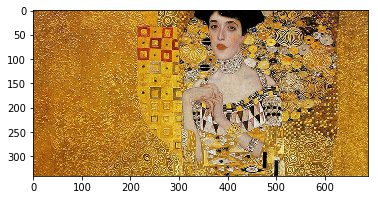

In [14]:
plt.imshow(cv2.cvtColor(img_amelie, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
def norm(x):
    return (x[0]**(2) + x[1]**(2) + x[2]**(2))**(1/2)

In [16]:
norm([1,1,1])

1.7320508075688772

In [17]:
min_distance = 0
min_pixel = []
for i in img_amelie:
    for j in i:
        if norm(j) <= min_distance:
            min_distance = norm(j)
            min_pixel = j

In [18]:
min_pixel

array([0, 0, 0], dtype=uint8)

In [19]:
min_distance

0.0

In [30]:
img_reshaped = np.reshape(img_amelie, (img_amelie.size//3,3))
img_reshaped_array = np.array([img_reshaped])

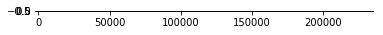

In [31]:
plt.imshow(cv2.cvtColor(img_reshaped_array, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
resized_image = cv2.resize(img_reshaped_array, (500, 100)) 

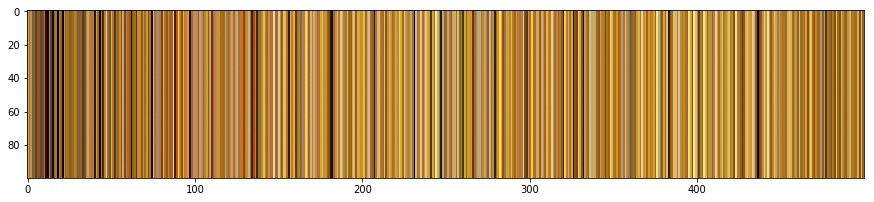

In [33]:
plt.figure(figsize=(15,5))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [39]:
img_series = pd.Series(list(img_reshaped))

In [40]:
img_series.head(5)

0    [23, 81, 135]
1    [30, 80, 134]
2    [32, 77, 129]
3    [49, 88, 141]
4    [50, 94, 151]
dtype: object

In [43]:
img_series.index = img_series.apply(norm)

In [46]:
img_series = img_series.sort_index()

In [61]:
img_reshaped_array = np.array([list(img_series)])

In [62]:
img_reshaped_array

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

In [63]:
resized_image = cv2.resize(img_reshaped_array, (500, 100)) 

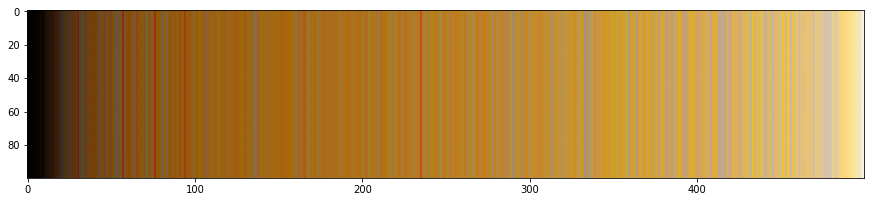

In [64]:
plt.figure(figsize=(15,5))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()